<a href="https://colab.research.google.com/github/KateFilippova/Birds/blob/main/Points_to_measure_GDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px
import requests
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.misc import derivative
from scipy.signal import find_peaks
import geopy.distance

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Птицы/hrc_KOL_37_F.csv')
df1['timestamp']= pd.to_datetime(df1['timestamp'])
df1 = df1.loc[(df1['timestamp'] >= '2021-03-01') & (df1['timestamp'] <= '2021-05-31')]
long1 = df1['location_long'].tolist()
lati1 = df1['location_lat'].tolist()
ids1 = df1['timestamp'].tolist()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Птицы/hrc_GWFG_2018_477.csv')
df2['timestamp']= pd.to_datetime(df2['timestamp'])
df2 = df2.loc[(df2['timestamp'] >= '2021-03-01') & (df2['timestamp'] <= '2021-05-31')]
long2 = df2['location_long'].tolist()
lati2 = df2['location_lat'].tolist()
ids2 = df2['timestamp'].tolist()

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Птицы/hrc_GWFG_2018_481.csv')
df3['timestamp']= pd.to_datetime(df3['timestamp'])
df3 = df3.loc[(df3['timestamp'] >= '2021-03-01') & (df3['timestamp'] <= '2021-05-31')]
long3 = df3['location_long'].tolist()
lati3 = df3['location_lat'].tolist()
ids3 = df3['timestamp'].tolist()

In [ ]:

df4 = pd.read_csv('/content/drive/MyDrive/Птицы/hrc_KOL_35_F.csv')
df4['timestamp']= pd.to_datetime(df4['timestamp'])
df4 = df4.loc[(df4['timestamp'] >= '2021-03-01') & (df4['timestamp'] <= '2021-05-31')]
long4 = df4['location_long'].tolist()
lati4 = df4['location_lat'].tolist()
ids4 = df4['timestamp'].tolist()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
file_names = ['point1-lat-53.2780721-lon-6.0344757-2021.csv',
 'point2-lat-53.0374906-lon-13.4381838-2021.csv',
 'point3-lat-51.0277036-lon-18.4997732-2021.csv',
 'point4-lat-55.1953842-lon-21.0317729-2021.csv',
 'point5-lat-57.9785435-lon-26.2223755-2021.csv',
 'point6-lat-60.0356004-lon-30.4300231-2021.csv',
 'point7-lat-62.4790135-lon-35.2405862-2021.csv',
 'point8-lat-64.2518157-lon-40.1520644-2021.csv',
 'point9-lat-67.2258524-lon-45.0777809-2021.csv',
 'point10-lat-69.105959-lon-48.901219-2021.csv',
 'point11-lat-53.2952082-lon-6.0658422-2021.csv',
 'point21-lat-52.7993385-lon-12.3007284-2021.csv',
 'point61-lat-61.0215183-lon-28.8832214-2021.csv',
 'point14-lat-58.9260072-lon-24.8460924-2021.csv',
 'point15-lat-65.5618162-lon-43.7913917-2021.csv',
 'point16-lat-63.0275181-lon-35.3808818-2021.csv',
 'point17-lat-55.2227051-lon-22.0152913-2021.csv',
 'point18-lat-54.0005321-lon-12.4547789-2021.csv']

In [ ]:
points_lon= []
labels = []
points_lat = []
for i in file_names:
    points_lon.append(float(i.split('-')[4]))
    labels.append(i.split('-')[0][5:])
    points_lat.append(float(i.split('-')[2]))

In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = long1,
    lat = lati1,
    text = ids1,
    marker = {'size': 5}))

fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = long2,
    lat = lati2,
    text = ids2,
    marker = {'size': 5}))

fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = long3,
    lat = lati3,
    text = ids3,
    marker = {'size': 5}))

fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = long4,
    lat = lati4,
    text = ids4,
    marker = {'size': 5}))

fig.add_trace(go.Scattermapbox(
    mode = "markers",
    lon = points_lon,
    lat = points_lat,
    text = labels,
    marker = {'size': 15}))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': 60, 'lat': 30},
        'style': "stamen-terrain",
        'center': {'lon': 30, 'lat': 60},
        'zoom': 3})

fig.show()

In [ ]:
res = []

def gdd_temp_to_table(file_name):
    # name - csv file
    name = file_name[29:]
    df = pd.read_csv(file_name)
    latitude = float(name.split('-')[2])
    lon = float(name.split('-')[4])
    point_num = name.split('-')[0][5:]
    t_base = round((-0.25*latitude + 13), 1)
    
        # расчет GDD
    def gdd_formula(temp_mean, t_base):
        '''
        :param a: список среднедневных температур 
        :param b: Tbase
        :return: список GDD 
        '''
        gdd = []
        for t in temp_mean:
            if t >= t_base:
                gdd.append(round((t - t_base), 1))
            else:
                gdd.append(0)
    
        return gdd
  
   
    df['GDD'] = pd.DataFrame(gdd_formula(df['temp'].tolist(), t_base)).cumsum()
    
    def sigmoid (x, A, h, slope, C):
        return 1 / (1 + np.exp ((x - h) / slope)) *  A + C

    # ищем параметры для уравнения
    p, _ = curve_fit(sigmoid, np.array(range(len(df['GDD']))) , df['GDD'])
    
    # определяем функцию по вычисленным параметрам
    def function(x):
        return 1 / (1 + np.exp ((x - p[1]) / p[2])) * p[0] + p[3]
  
    # вычисляем третью производную n = 3
    def deriv(x):
        return derivative(function, x, n=3, order=5)
    y = np.array(range(len(df['GDD'])))
    peaks, _ = find_peaks(deriv(y), height=0)
    x = peaks[0]
    gdd_date = df['datetime'][x]
    
    res.append({'point_num': point_num, 'point_lat': latitude, 'point_lon': lon, 'point_gdd': gdd_date})

In [ ]:
res = []
for i in file_names:
    try:
        gdd_temp_to_table('/content/drive/MyDrive/Птицы/' + i)
    except:
        continue
res

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning:

overflow encountered in exp



[{'point_gdd': '2021-04-23',
  'point_lat': 51.0277036,
  'point_lon': 18.4997732,
  'point_num': '3'},
 {'point_gdd': '2021-04-14',
  'point_lat': 55.1953842,
  'point_lon': 21.0317729,
  'point_num': '4'},
 {'point_gdd': '2021-04-03',
  'point_lat': 57.9785435,
  'point_lon': 26.2223755,
  'point_num': '5'},
 {'point_gdd': '2021-04-24',
  'point_lat': 60.0356004,
  'point_lon': 30.4300231,
  'point_num': '6'},
 {'point_gdd': '2021-04-25',
  'point_lat': 62.4790135,
  'point_lon': 35.2405862,
  'point_num': '7'},
 {'point_gdd': '2021-04-12',
  'point_lat': 64.2518157,
  'point_lon': 40.1520644,
  'point_num': '8'},
 {'point_gdd': '2021-04-24',
  'point_lat': 67.2258524,
  'point_lon': 45.0777809,
  'point_num': '9'},
 {'point_gdd': '2021-05-11',
  'point_lat': 69.105959,
  'point_lon': 48.901219,
  'point_num': '10'},
 {'point_gdd': '2021-05-05',
  'point_lat': 61.0215183,
  'point_lon': 28.8832214,
  'point_num': '61'},
 {'point_gdd': '2021-04-08',
  'point_lat': 58.9260072,
  'point

In [ ]:
df = pd.DataFrame.from_dict(res)
df.to_csv('gdd_dates.csv', index=False)
df

point_num  point_lat  point_lon   point_gdd
0          3  51.027704  18.499773  2021-04-23
1          4  55.195384  21.031773  2021-04-14
2          5  57.978544  26.222375  2021-04-03
3          6  60.035600  30.430023  2021-04-24
4          7  62.479014  35.240586  2021-04-25
5          8  64.251816  40.152064  2021-04-12
6          9  67.225852  45.077781  2021-04-24
7         10  69.105959  48.901219  2021-05-11
8         61  61.021518  28.883221  2021-05-05
9         14  58.926007  24.846092  2021-04-08
10        15  65.561816  43.791392  2021-05-06
11        16  63.027518  35.380882  2021-04-23
12        17  55.222705  22.015291  2021-04-09

In [ ]:
def birds_dates(name):
    file_name = name[29:]
    df = pd.read_csv('/content/gdd_dates.csv')
    # read file
    df1 = pd.read_csv(name)
    df1 = df1[['timestamp', 'location_long', 'location_lat']]
    df1['timestamp']= pd.to_datetime(df1['timestamp'])
    df1 = df1.loc[(df1['timestamp'] >= '2021-03-01') & (df1['timestamp'] <= '2021-05-31')]
    df1['timestamp'] = pd.to_datetime(df1['timestamp']).dt.date
    
    # choose dates when bird arrived to the point
    dates = []
    for i in range(0, len(df1)):
        for j in range(0, len(df)):
            coords_1 = (df['point_lat'].iloc[j], df['point_lon'].iloc[j])
            coords_2 = (df1['location_lat'].iloc[i], df1['location_long'].iloc[i])
            if geopy.distance.geodesic(coords_1, coords_2).km < 11 and [df['point_num'].iloc[j], df1['timestamp'].iloc[i]] not in dates:
                dates.append([df['point_num'].iloc[j], df1['timestamp'].iloc[i]])
    new_dates = []
    for i in range(1, len(dates)):
        if dates[i][0] != dates[i-1][0]:
            new_dates.append(dates[i])
        
    df["bird_arrival"] = np.nan
    df["bird_name"] = np.nan
    
    for i in range(0, len(new_dates)):
        df.loc[df['point_num'] == new_dates[i][0], "bird_arrival"] = new_dates[i][1]
        df.loc[df['point_num'] == new_dates[i][0], 'bird_name'] = file_name[:-4]
    
    df.dropna(subset=['bird_arrival'], inplace=True)
    
    df['bird_arrival'] = pd.to_datetime(df['bird_arrival']).dt.date
    df['point_gdd'] = pd.to_datetime(df['point_gdd']).dt.date
    df['difference'] = df['bird_arrival']-df['point_gdd']
    
    return df

In [ ]:
df_1 = birds_dates('/content/drive/MyDrive/Птицы/hrc_GWFG_2018_477.csv')

In [ ]:
df_1 = df
df_1

point_num  point_lat  point_lon   point_gdd bird_arrival  \
1           4  55.195384  21.031773  2021-04-14   2021-03-27   
2           5  57.978544  26.222375  2021-04-03   2021-05-10   
3           6  60.035600  30.430023  2021-04-24   2021-05-10   
4           7  62.479014  35.240586  2021-04-25   2021-05-12   
5           8  64.251816  40.152064  2021-04-12   2021-05-12   
6           9  67.225852  45.077781  2021-04-24   2021-05-22   
7          10  69.105959  48.901219  2021-05-11   2021-05-26   
10         15  65.561816  43.791392  2021-05-06   2021-05-12   

            bird_name difference  
1   hrc_GWFG_2018_477   -18 days  
2   hrc_GWFG_2018_477    37 days  
3   hrc_GWFG_2018_477    16 days  
4   hrc_GWFG_2018_477    17 days  
5   hrc_GWFG_2018_477    30 days  
6   hrc_GWFG_2018_477    28 days  
7   hrc_GWFG_2018_477    15 days  
10  hrc_GWFG_2018_477     6 days

In [ ]:
df_2 = birds_dates('/content/drive/MyDrive/Птицы/hrc_KOL_37_F.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DtypeWarning:

Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df_2

point_num  point_lat  point_lon   point_gdd bird_arrival     bird_name  \
8          61  61.021518  28.883221  2021-05-05   2021-05-11  hrc_KOL_37_F   
9          14  58.926007  24.846092  2021-04-08   2021-03-26  hrc_KOL_37_F   
10         15  65.561816  43.791392  2021-05-06   2021-05-11  hrc_KOL_37_F   
11         16  63.027518  35.380882  2021-04-23   2021-05-11  hrc_KOL_37_F   

   difference  
8      6 days  
9    -13 days  
10     5 days  
11    18 days

In [ ]:
df_3 = birds_dates('/content/drive/MyDrive/Птицы/hrc_GWFG_2018_481.csv')

In [ ]:
df_3

point_num  point_lat  point_lon   point_gdd bird_arrival  \
5           8  64.251816  40.152064  2021-04-12   2021-05-10   
6           9  67.225852  45.077781  2021-04-24   2021-05-18   
9          14  58.926007  24.846092  2021-04-08   2021-03-30   
10         15  65.561816  43.791392  2021-05-06   2021-05-10   
11         16  63.027518  35.380882  2021-04-23   2021-05-10   

            bird_name difference  
5   hrc_GWFG_2018_481    28 days  
6   hrc_GWFG_2018_481    24 days  
9   hrc_GWFG_2018_481    -9 days  
10  hrc_GWFG_2018_481     4 days  
11  hrc_GWFG_2018_481    17 days

In [ ]:
df_4 = birds_dates('/content/drive/MyDrive/Птицы/hrc_KOL_35_F.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DtypeWarning:

Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df_4

point_num  point_lat  point_lon   point_gdd bird_arrival     bird_name  \
6          9  67.225852  45.077781  2021-04-24   2021-05-19  hrc_KOL_35_F   
8         61  61.021518  28.883221  2021-05-05   2021-05-14  hrc_KOL_35_F   

  difference  
6    25 days  
8     9 days

In [ ]:
df_5 = birds_dates('/content/drive/MyDrive/Птицы/hrc_KOL_23_M.csv')
df_5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DtypeWarning:

Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.



point_num  point_lat  point_lon   point_gdd bird_arrival     bird_name  \
9         14  58.926007  24.846092  2021-04-08   2021-04-09  hrc_KOL_23_M   

  difference  
9     1 days

In [ ]:
df_result = pd.concat([df_1, df_2, df_3, df_4, df_5])
df_result

point_num  point_lat  point_lon   point_gdd bird_arrival  \
1           4  55.195384  21.031773  2021-04-14   2021-03-27   
2           5  57.978544  26.222375  2021-04-03   2021-05-10   
3           6  60.035600  30.430023  2021-04-24   2021-05-10   
4           7  62.479014  35.240586  2021-04-25   2021-05-12   
5           8  64.251816  40.152064  2021-04-12   2021-05-12   
6           9  67.225852  45.077781  2021-04-24   2021-05-22   
7          10  69.105959  48.901219  2021-05-11   2021-05-26   
10         15  65.561816  43.791392  2021-05-06   2021-05-12   
8          61  61.021518  28.883221  2021-05-05   2021-05-11   
9          14  58.926007  24.846092  2021-04-08   2021-03-26   
10         15  65.561816  43.791392  2021-05-06   2021-05-11   
11         16  63.027518  35.380882  2021-04-23   2021-05-11   
5           8  64.251816  40.152064  2021-04-12   2021-05-10   
6           9  67.225852  45.077781  2021-04-24   2021-05-18   
9          14  58.926007  24.846092  2021-04-08   2021-03-30   
10         15  65.561816  43.791392  2021-05-06   2021-05-10   
11         16  63.027518  35.380882  2021-04-23   2021-05-10   
6           9  67.225852  45.077781  2021-04-24   2021-05-19   
8          61  61.021518  28.883221  2021-05-05   2021-05-14   
9          14  58.926007  24.846092  2021-04-08   2021-04-09   

            bird_name difference  
1   hrc_GWFG_2018_477   -18 days  
2   hrc_GWFG_2018_477    37 days  
3   hrc_GWFG_2018_477    16 days  
4   hrc_GWFG_2018_477    17 days  
5   hrc_GWFG_2018_477    30 days  
6   hrc_GWFG_2018_477    28 days  
7   hrc_GWFG_2018_477    15 days  
10  hrc_GWFG_2018_477     6 days  
8        hrc_KOL_37_F     6 days  
9        hrc_KOL_37_F   -13 days  
10       hrc_KOL_37_F     5 days  
11       hrc_KOL_37_F    18 days  
5   hrc_GWFG_2018_481    28 days  
6   hrc_GWFG_2018_481    24 days  
9   hrc_GWFG_2018_481    -9 days  
10  hrc_GWFG_2018_481     4 days  
11  hrc_GWFG_2018_481    17 days  
6        hrc_KOL_35_F    25 days  
8        hrc_KOL_35_F     9 days  
9        hrc_KOL_23_M     1 days

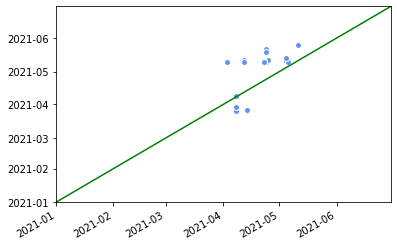

In [ ]:
import datetime
fig, ax = plt.subplots()
ax.plot_date(x = df_result['point_gdd'], y = df_result['bird_arrival'], markerfacecolor='CornflowerBlue', markeredgecolor='white')
fig.autofmt_xdate()
ax.set_xlim([datetime.date(2021, 1, 1), datetime.date(2021, 6, 30)])
ax.set_ylim([datetime.date(2021, 1, 1), datetime.date(2021, 6, 30)])
# plt.scatter(x = df_result['point_gdd'], y = df_result['bird_arrival'])
#xlim = [datetime.date(2021, 3, 1), datetime.date(2021, 5, 31)]
#ylim = [datetime.date(2021, 3, 1), datetime.date(2021, 5, 31)]
plt.label
plt.plot([datetime.date(2021, 1, 1), datetime.date(2021, 6, 30)], [datetime.date(2021, 1, 1), datetime.date(2021, 6, 30)], 'k-', color = 'g')
plt.show()